In [5]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


from plotting_functions import *
import math
import csv
import time
from math import log
import networkx as nx
from os import listdir
import random
import io
from io import StringIO
import codecs
import math
from os.path import isfile, join
#from geopy.distance.geodesic import vincenty
# In[2]:
from math import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition

we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 10.0 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 11.288378916846888 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 12.742749857031333 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 14.38449888287663 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 16.237767391887218 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 18.329807108324356 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 20.6913808111479 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 23.357214690901227 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 26.366508987303583 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 29.763514416313175 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=200,delat2 point 33.59818286283781 100.0
we get

we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 33.59818286283781 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 37.926901907322495 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 42.81332398719393 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 48.32930238571752 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 54.5559478116852 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 61.58482110660264 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 69.51927961775604 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 78.47599703514611 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 88.58667904100822 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=400,delat8 point 100.0 100.0
we get the values for scheme Strg_Fth = 0.8,Stg_C=300,delat4 point 10.0 100.0
we get the values for sc

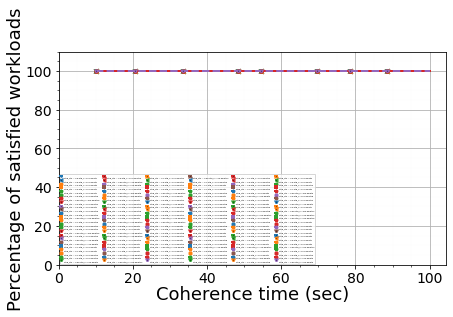

In [27]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = int(line[6])
        objective_value = float(line[7])
#         print("objective_value",objective_value)
        if objective_value==-1:
            objective_value = 0
        else:
            objective_value = 1
        if  ( t_max in [10] and request_fidelity_threshold in [0.7]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",Stg_C="+str(storage_capacity)+",delat"+str(delta)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh]+=objective_value
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= objective_value
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=objective_value
            try:
                each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]+=1
            except:
                try:
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]= 1
                except:
                    each_scheme_each_coherence_time_all_workloads[scheme]={}
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]=1
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,satisfied_number in τ_coh_value_satisfied_number.items():
        
        percentage = satisfied_number/each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]*100
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = percentage
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=percentage
        selected_values.append(percentage)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Percentage of satisfied workloads",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values)+10,
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,6,2,
                      "plots/QSN_repeater_chain_workload_as_coh_time.pdf",True,2,6.4,3.8,False)